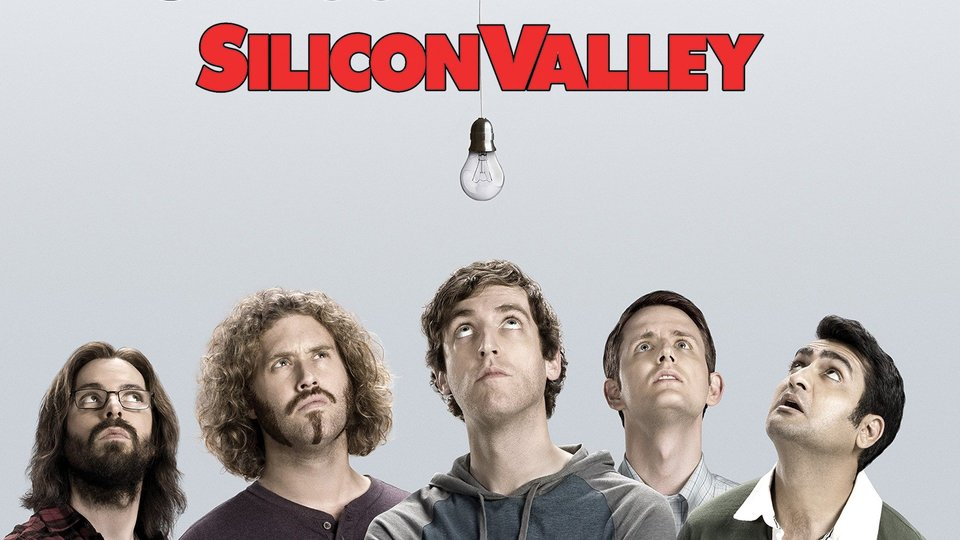

In [2]:
%matplotlib inline

import pandas as pd
from IPython.display import display
pd.options.display.max_columns = None
import gc
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from IPython.display import display
from sklearn import metrics
import missingno as msno
from sklearn.model_selection import train_test_split
import statistics
#from imblearn.over_sampling import SMOTE
import numpy as np
import seaborn as sns

In [3]:
objects = pd.read_csv('objects.csv')

/Users/amangupta/anaconda/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (3,7,9,10,17,18,21,22,23,25,26,29,30,37) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


We will focus on four main status types for companies - Operating, acquired,closed and IPO 

In [4]:
objects['status'].value_counts()

operating      443663
acquired         9394
live             4349
closed           2773
ipo              1134
beta              780
development       226
private           219
alpha             113
Name: status, dtype: int64

In [5]:
objects = objects[(objects['status']=='operating') | (objects['status']=='acquired')
                  | (objects['status']=='closed') | (objects['status']=='ipo') ]

In [6]:
objects['status'].value_counts()

operating    443663
acquired       9394
closed         2773
ipo            1134
Name: status, dtype: int64

In [7]:
objects.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107,34,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,0,0,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200,74,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


We also just want to focus on the startups and not the private equity funds/people involved in the startup world. By filtering by entity type, we are now left with 196553 startups to work with 

In [8]:
objects = objects[objects['entity_type']=='Company']

In [9]:
objects.shape

(196553, 40)

In [10]:
objects.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 196553 entries, 0 to 196552
Data columns (total 40 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   id                   196553 non-null  object 
 1   entity_type          196553 non-null  object 
 2   entity_id            196553 non-null  int64  
 3   parent_id            0 non-null       object 
 4   name                 196553 non-null  object 
 5   normalized_name      196549 non-null  object 
 6   permalink            196553 non-null  object 
 7   category_code        123186 non-null  object 
 8   status               196553 non-null  object 
 9   founded_at           91227 non-null   object 
 10  closed_at            2620 non-null    object 
 11  domain               126545 non-null  object 
 12  homepage_url         126545 non-null  object 
 13  twitter_username     80591 non-null   object 
 14  logo_url             110110 non-null  object 
 15  logo_width       

Dropping features such as created_at, updated_at which are just meta data that will not help with the analysis 

In [11]:
df = objects.drop(['updated_at','created_at','created_by','logo_height','logo_width','logo_url','twitter_username',
             'homepage_url','domain','permalink','name','parent_id'],axis=1)

In [12]:
df.head()

,id,entity_type,entity_id,normalized_name,category_code,status,founded_at,closed_at,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,wetpaint,web,operating,2005-10-17,NaN,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,flektor,games_video,acquired,NaN,NaN,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6
2,c:100,Company,100,there,games_video,acquired,NaN,NaN,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12
3,c:10000,Company,10000,mywebbo,network_hosting,operating,2008-07-26,NaN,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0
4,c:10001,Company,10001,the movie streamer,games_video,operating,2008-07-26,NaN,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0


Visualizing the missing values in the remaining features to make decisions on which other features can be dropped. closed_at only has 51 values so it may not be a useful predictor in our model. Short description is also predominantly empty and can be dropped. 

<AxesSubplot:>

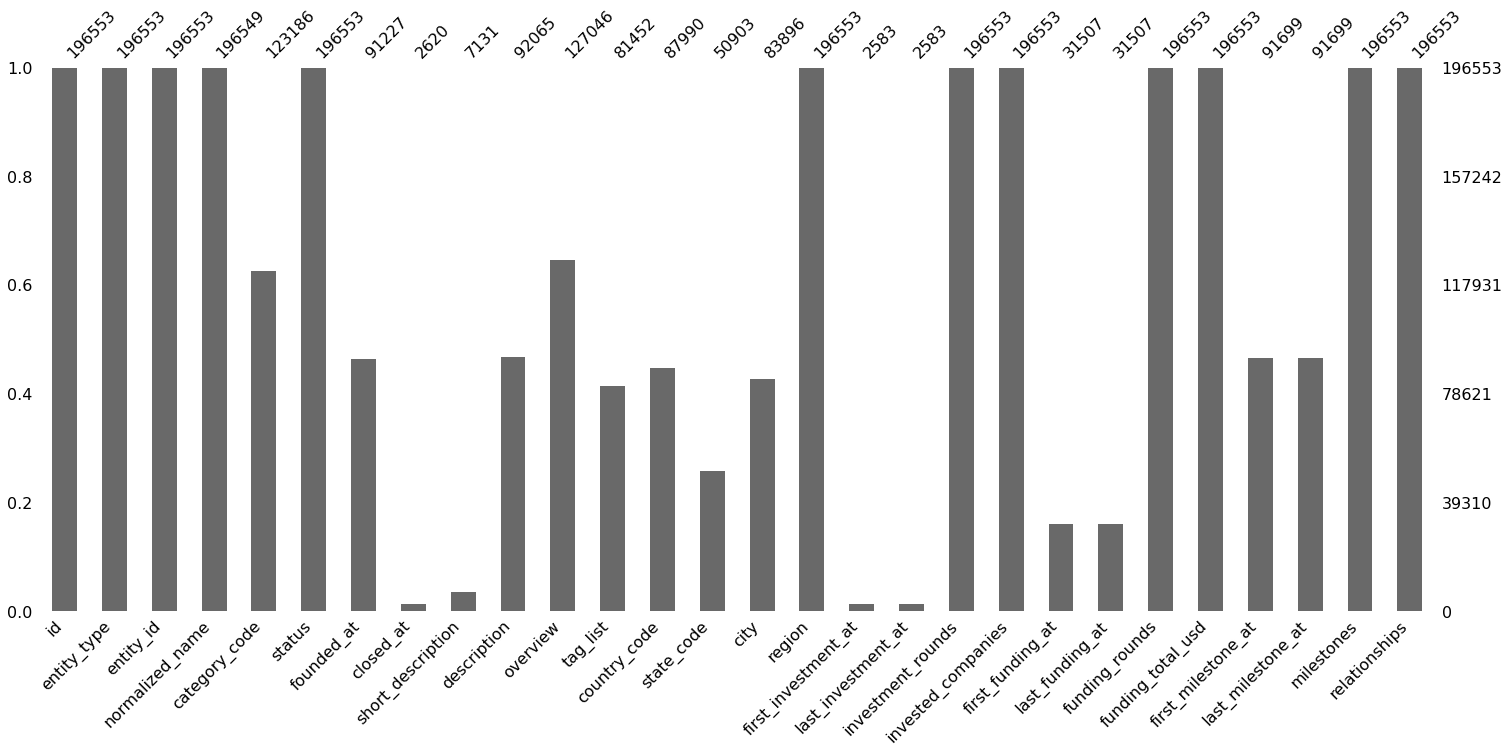

In [13]:
msno.bar(df)

In [14]:
df = df.drop(['short_description','closed_at'],axis=1)

In [15]:
df.head()

,id,entity_type,entity_id,normalized_name,category_code,status,founded_at,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships
0,c:1,Company,1,wetpaint,web,operating,2005-10-17,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17
1,c:10,Company,10,flektor,games_video,acquired,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6
2,c:100,Company,100,there,games_video,acquired,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12
3,c:10000,Company,10000,mywebbo,network_hosting,operating,2008-07-26,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0
4,c:10001,Company,10001,the movie streamer,games_video,operating,2008-07-26,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0


Important variables for analysis - category_code, country_code, state_code, investment_rounds, invested_companies, funding_rounds, funding_total_usd, milestones, relationships. The target variable is status

Understanding the category_code feature - The top 20 most popular startup types are as follows. Software, web, ecommerce are the most popular.

<AxesSubplot:>

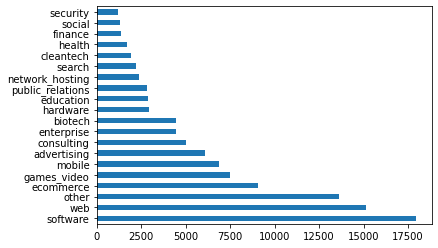

In [16]:
df['category_code'].value_counts()[0:20].plot(kind='barh')

Which category has the most failed startups? 

In [17]:
temp = df[df['status']=='closed']

The failure trend seems to follow the frequency of startups as the most failures are in the industries with the most start up. This makes sense as there might be immense competition in these categories, making it hard for startups to differentiate themselves and find a niche that allows them to leverage their core competence.

<AxesSubplot:>

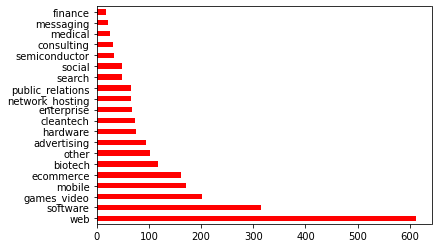

In [18]:
temp['category_code'].value_counts()[0:20].plot(kind='barh',color='red')

Which category has the most IPO's? Biotech appears to be the most lucrative space as it has a significantly higher number of IPO's even though there are fewer total startups in the space. 

In [19]:
temp = df[df['status']=='ipo']

<AxesSubplot:>

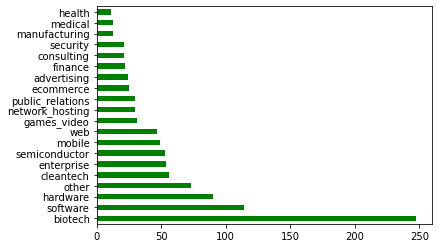

In [20]:
temp['category_code'].value_counts()[0:20].plot(kind='barh',color='green')

In [21]:
temp = df[df['status']=='closed']
temp2 = df[df['status']=='operating']

In [22]:
category_failure = temp.groupby('category_code')['status'].count()

In [23]:
category_operating = temp2.groupby('category_code')['status'].count()

In [24]:
failure_rate_by_cat = (category_failure/category_operating)*100

In [25]:
tempdf= pd.DataFrame({'category_code':failure_rate_by_cat.index, 'ratio':failure_rate_by_cat.values})

Understanding failure rate by industry. security, advertising, music and analytics seem to have the highest failure rate. 

In [26]:
t = tempdf[tempdf['ratio']>0]
t= t.sort_values(by='ratio')[0:20]

<AxesSubplot:xlabel='category_code'>

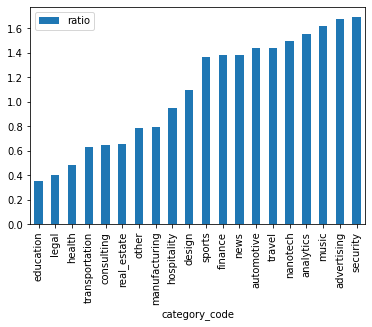

In [27]:
t.plot.bar(x='category_code',y='ratio')

Understanding country code feature - most startups (atleast in this database) are founded/predominantly operated in the USA. GBR and IND are second and third but are behind by quite a margin

<AxesSubplot:>

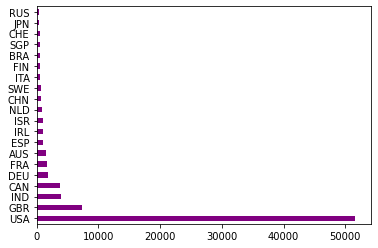

In [28]:
df['country_code'].value_counts()[0:20].plot(kind='barh',color='purple')

Understanding the distribution for milestone,relationships,funding_rounds and investment_rounds, which are numerical variables

In [29]:
num_var = ['milestones','relationships','funding_rounds','investment_rounds'] 

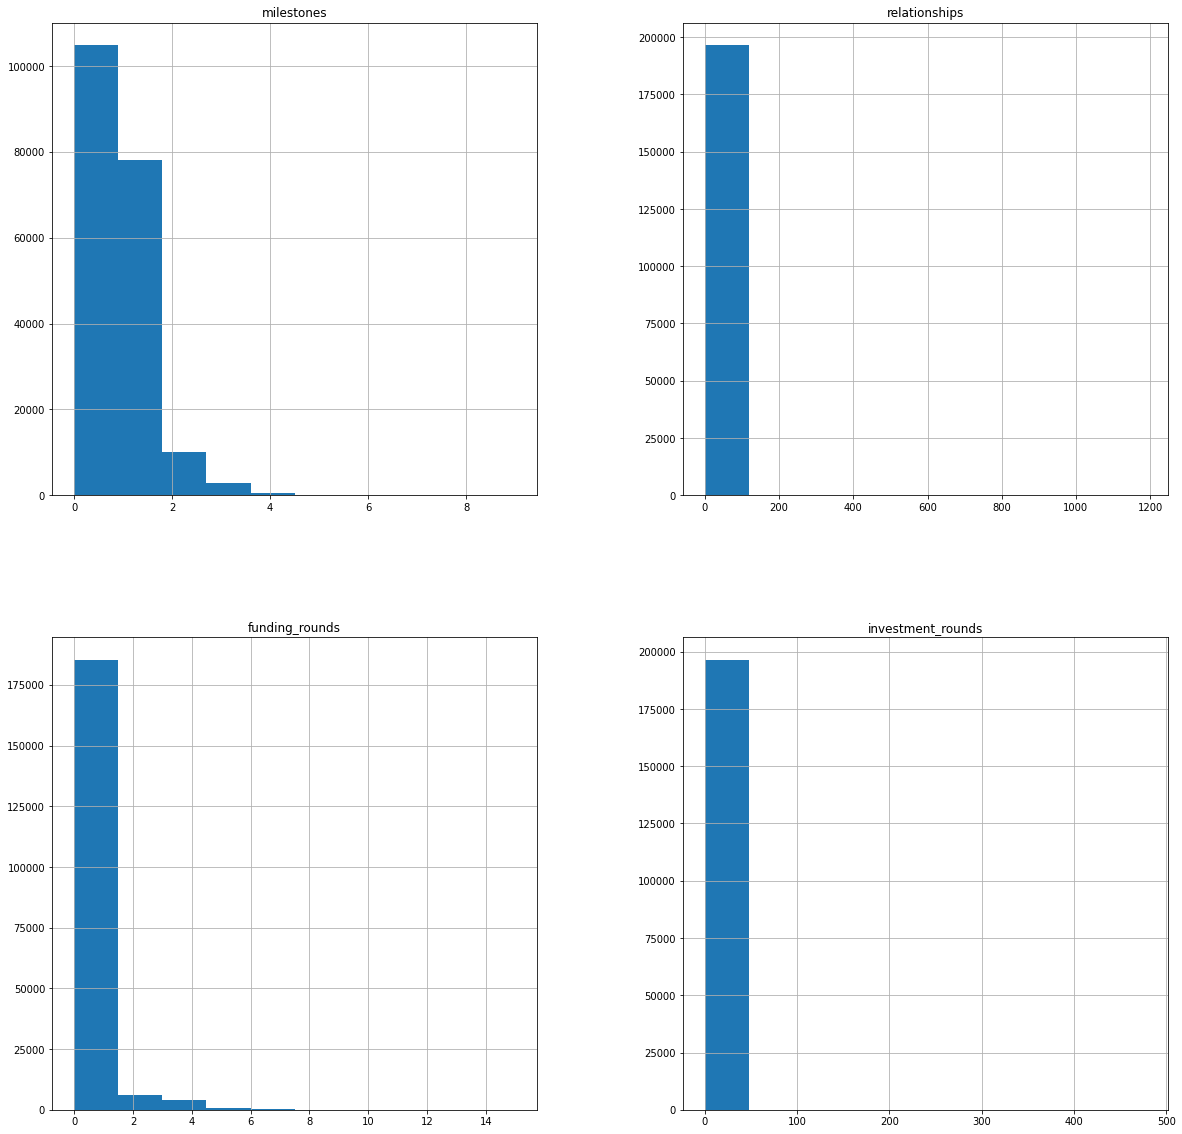

In [30]:
plots = df[num_var].hist(figsize=(20,20))

milestones and funding rounds seem left skewed so we can use box cox transformation to normalize those features

In [31]:
df['funding_rounds'].value_counts()

0     164846
1      20534
2       6142
3       2662
4       1216
5        600
6        249
7        147
8         67
9         46
10        23
11        10
13         5
12         3
15         2
14         1
Name: funding_rounds, dtype: int64

Does the mean funding rounds change for successful vs unsuccessful statups? Interestingly, operating and acquired companies had a lower mean value than closed/IPO start ups. This suggests that funding rounds can have a very extreme impact on the trajectory on a startup. The influx in cash can either really help a company succeed and breakout. Or it can also result in mismanagement and extreme unsustainable growth that can cause start ups to fail


In [32]:
df.groupby('status')['funding_rounds'].mean()

status
acquired     0.523526
closed       1.118421
ipo          1.091711
operating    0.237570
Name: funding_rounds, dtype: float64

Do relationships affect the trajectory of a startup? There is a huge gap between all the categories and IPO. This really emphasizes how difficult it is to get a startup to the IPO phase and shows the importance of relationships in different areas to make this happen as it is a huge collaborative effort. The mean relationships for acquisitions is also higher than operating or closed. 

<AxesSubplot:xlabel='status'>

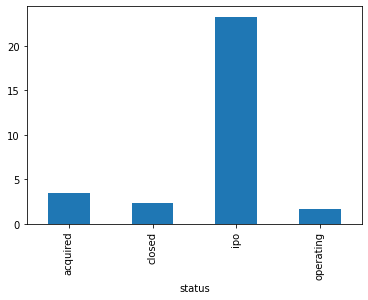

In [33]:
df.groupby('status')['relationships'].mean().plot(kind='bar')

Preparing the features for the model -  First we will transform the categorical variables using label encoding. We chose to use label encoding instead of one hot encoding as there were alot of categories for each categorical variable. If we used one hot encoding, we would have too many features to look at

In [34]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
df['category_code_enc'] = le.fit_transform(df['category_code'])
df['country_code_enc'] = le.fit_transform(df['country_code'])
df['state_code_enc'] = le.fit_transform(df['state_code'])


We have to normalize the numerical variables as these features have very different magnitudes and at present we don't know if any variable is more important than the other so we do not want to weight features differently.

In [35]:
num_vars = ['investment_rounds','invested_companies','funding_rounds','funding_total_usd','milestones','relationships']

In [36]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df[num_vars] = scaler.fit_transform(df[num_vars])

Important variables for analysis - category_code, country_code, state_code, investment_rounds, invested_companies, funding_rounds, funding_total_usd, milestones, relationships. The target variable is status

Creating the target variable for prediction - 

success = 1 -> IPO, operating, acquired

failure = 0 -> closed

In [37]:
df['status_enc'] = df['status'].apply(lambda x: 1 if ((x=="ipo")|(x=="acquired")|(x=="operating") ) else 0)

In [38]:
df.status_enc.value_counts()

1    193969
0      2584
Name: status_enc, dtype: int64

After encoding, we can see that we have a highly imbalanced data set. The majority class is sucessful while the minority class is failed startups. In order to deal with this imbalance, we will use random oversampling and SMOTE

Option1: Random Sampling

In [39]:
df.columns

Index(['id', 'entity_type', 'entity_id', 'normalized_name', 'category_code',
       'status', 'founded_at', 'description', 'overview', 'tag_list',
       'country_code', 'state_code', 'city', 'region', 'first_investment_at',
       'last_investment_at', 'investment_rounds', 'invested_companies',
       'first_funding_at', 'last_funding_at', 'funding_rounds',
       'funding_total_usd', 'first_milestone_at', 'last_milestone_at',
       'milestones', 'relationships', 'category_code_enc', 'country_code_enc',
       'state_code_enc', 'status_enc'],
      dtype='object')

In [40]:
X = df.drop(['id','entity_type','entity_id','normalized_name','status','founded_at','description',
            'overview','tag_list','country_code', 'state_code', 'city', 'region', 'first_investment_at',
       'last_investment_at','first_funding_at', 'last_funding_at','first_milestone_at', 'last_milestone_at','status_enc','category_code'],axis=1)

y = df['status_enc']

In [41]:
from sklearn.datasets import make_classification
from collections import Counter
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_rand, y_rand = ros.fit_resample(X, y)

Option2: SMOTE

In [42]:
from imblearn.over_sampling import SMOTE 

sm = SMOTE(random_state=42)
X_smote, y_smote = sm.fit_resample(X, y)

Splitting the balanced data into test and train to begin building machine learning models

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote,y_smote , train_size=0.7, test_size=0.3, random_state=42)

Building a base model - Logistic Regression


In [44]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(random_state=42,solver='saga',max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

In [45]:
import dmba
from sklearn.metrics import accuracy_score

print(logreg.__class__.__name__, accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__, dmba.classificationSummary(y_test, y_pred))


LogisticRegression 0.8395198570225636
Confusion Matrix (Accuracy 0.8395)

       Prediction
Actual     0     1
     0 47682 10377
     1  8300 50023
LogisticRegression None


In [228]:
pd.set_option("max_rows", None)
feature_imp = logreg.coef_
coef_table = pd.DataFrame({"feature_names":X_train.columns,"Beta":feature_imp[0],"AbsBeta":abs(feature_imp[0])})

coef_table =coef_table.sort_values(by = "AbsBeta",ascending=False)
coef_table

,feature_names,Beta,AbsBeta
2,funding_rounds,-1.546120,1.546120
5,relationships,1.226820,1.226820
3,funding_total_usd,0.670392,0.670392
0,investment_rounds,0.535460,0.535460
1,invested_companies,0.479702,0.479702
4,milestones,-0.176328,0.176328
8,state_code_enc,0.017707,0.017707
7,country_code_enc,0.005471,0.005471
6,category_code_enc,0.000958,0.000958


Using GridSearchCV, we were able to very slightly increase accuracy of the model. We found that using an l1 penalty instead of the default l2 penalty provided better results

In [232]:
from sklearn.model_selection import GridSearchCV

log_para = {'C':list(range(1,10)),'penalty':['l1','l2','elasticnet'] }
clf1 = GridSearchCV(logreg, log_para, cv=5, n_jobs=-1)

In [233]:
clf1.fit(X_train, y_train)
y_pred = clf1.predict(X_test)
print(clf1.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/amangupta/anaconda/lib/python3.6/site-packages/sklearn/model_selection/_search.py:925: UserWarning: One or more of the test scores are non-finite: [0.83600068 0.83599331        nan 0.83598963 0.83598595        nan
 0.83598595 0.83598595        nan 0.83598595 0.83598595        nan
 0.83598595 0.83598595        nan 0.83598595 0.83598595        nan
 0.83598595 0.83598595        nan 0.83598595 0.83598595        nan
 0.83598595 0.83598595        nan]
  category=UserWarning


GridSearchCV 0.8395284494165764


In [234]:
clf1.best_params_

{'C': 1, 'penalty': 'l1'}

Checking if C =1 is really the best parameter by using smaller increments of C

In [242]:
from scipy.stats import reciprocal, uniform
C_options= list(np.arange(1, 2,0.1))

log_para = {'C':C_options}
logreg2 = LogisticRegression(random_state=42,solver='saga',max_iter=1000,penalty='l1')
clf2 = GridSearchCV(logreg2, log_para, cv=5, n_jobs=-1)


In [243]:
clf2.fit(X_train, y_train)
y_pred = clf2.predict(X_test)
print(clf2.__class__.__name__, accuracy_score(y_test, y_pred))

GridSearchCV 0.8395284494165764


In [244]:
clf2.best_params_

{'C': 1.0}

Checking to see if using random oversampling data provides better results than SMOTE

In [245]:
from sklearn.model_selection import train_test_split
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_rand,y_rand , train_size=0.7, test_size=0.3, random_state=42)

In [246]:
logreg = LogisticRegression(random_state=42,solver='saga',max_iter=1000,penalty='l1')
logreg.fit(X_train_2, y_train_2)
y_pred = logreg.predict(X_test_2)

In [247]:
print(logreg.__class__.__name__, accuracy_score(y_test, y_pred))
print(logreg.__class__.__name__, dmba.classificationSummary(y_test, y_pred))

LogisticRegression 0.8264508257290646
Confusion Matrix (Accuracy 0.8265)

       Prediction
Actual     0     1
     0 46489 11570
     1  8628 49695
LogisticRegression None


TAKEAWAY FROM LOGISTIC REGRESSION: It appears that SMOTE results in better performance than random oversampling. Also, adding a penalty=l2 instead of the default also increases performance. 

Running backward selection on the features to see whether a subset of features would improve performance of the model, using the best parameters found using GridSearchCV 

In [220]:
features = ['category_code_enc','country_code_enc','state_code_enc','milestones',
            'invested_companies','investment_rounds','funding_total_usd',
           'relationships','funding_rounds']

Model 2: Random Forest

In [249]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(random_state=42)
rfclf.fit(X_train, y_train)
y_pred = rfclf.predict(X_test)

In [251]:
print(rfclf.__class__.__name__, accuracy_score(y_test, y_pred))
print(rfclf.__class__.__name__, dmba.classificationSummary(y_test, y_pred))

RandomForestClassifier 0.9678214844219897
Confusion Matrix (Accuracy 0.9678)

       Prediction
Actual     0     1
     0 55714  2345
     1  1400 56923
RandomForestClassifier None


In [252]:
import time
import numpy as np

start_time = time.time()
importances = rfclf.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfclf.estimators_], axis=0)
elapsed_time = time.time() - start_time

print(f"Elapsed time to compute the importances: {elapsed_time:.3f} seconds")

Elapsed time to compute the importances: 0.084 seconds


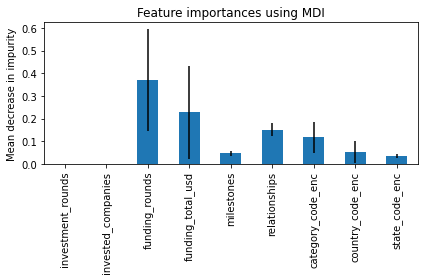

In [254]:
forest_importances = pd.Series(importances, index=X_train.columns)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

RandomForests offer about 13% more accuracy than logistic regression. According to the model, funding_rounds, total_funding and relationships are the three most important features on the basis of mean decrease in impurity. This is the same top 3 in the logistic regression model, however, the logistic model gave more importance to relationships than funding_total

Model 3: SVC - LinearSVC performs very poorly as compared to the other models so we will remove it from the VotingClassifier

In [255]:
from sklearn.svm import LinearSVC
svcclf = LinearSVC(random_state=0, tol=1e-5)
svcclf.fit(X_train, y_train)
y_pred = svcclf.predict(X_test)

/Users/amangupta/anaconda/lib/python3.6/site-packages/sklearn/svm/_base.py:986: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


In [256]:
print(svcclf.__class__.__name__, accuracy_score(y_test, y_pred))
print(svcclf.__class__.__name__, dmba.classificationSummary(y_test, y_pred))

LinearSVC 0.5760598718014813
Confusion Matrix (Accuracy 0.5761)

       Prediction
Actual     0     1
     0 56113  1946
     1 47393 10930
LinearSVC None


Now that we have tried RandomForests, Logistic Regression models and SVC on their own, we will now look at some ensemble approachs to improving the overall performance of the model.

In [46]:
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression 

log_clf = LogisticRegression(random_state=42,solver='saga',max_iter=1000,penalty='l1')
rnd_clf = RandomForestClassifier(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf)],
    voting='soft')


In [47]:
voting_clf.fit(X_train, y_train)
y_pred = voting_clf.predict(X_test)


Using a voting classifier with logreg and randomforests gives better performance than just a logistic regression. However, the accuracy is lower than what we achieved by just using the randomforest model 

In [49]:
print(voting_clf.__class__.__name__, accuracy_score(y_test, y_pred))
print(voting_clf.__class__.__name__, dmba.classificationSummary(y_test, y_pred))

VotingClassifier 0.9454640752006324
Confusion Matrix (Accuracy 0.9455)

       Prediction
Actual     0     1
     0 55202  2857
     1  3490 54833
VotingClassifier None


The baggingclassifier also did not increase the performance of the random forest model

In [51]:
from sklearn.ensemble import BaggingClassifier


bag_clf = BaggingClassifier(
    RandomForestClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)



In [53]:
print(bag_clf.__class__.__name__, accuracy_score(y_test, y_pred))

BaggingClassifier 0.8660789469161898


In [54]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=100, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [55]:
print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

AdaBoostClassifier 0.9100805966558403


Additional EDA for presentation

In [56]:
objects.head()

,id,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,founded_at,closed_at,domain,homepage_url,twitter_username,logo_url,logo_width,logo_height,short_description,description,overview,tag_list,country_code,state_code,city,region,first_investment_at,last_investment_at,investment_rounds,invested_companies,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at
0,c:1,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,2005-10-17,NaN,wetpaint-inc.com,http://wetpaint-inc.com,BachelrWetpaint,http://s3.amazonaws.com/crunchbase_prod_assets...,401,54,NaN,Technology Platform Company,Wetpaint is a technology platform company that...,"wiki, seattle, elowitz, media-industry, media-...",USA,WA,Seattle,Seattle,NaN,NaN,0,0,2005-10-01,2008-05-19,3,39750000.0,2010-09-05,2013-09-18,5,17,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00
1,c:10,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,NaN,NaN,flektor.com,http://www.flektor.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,186,85,NaN,NaN,Flektor is a rich-media mash-up platform that ...,"flektor, photo, video",USA,CA,Culver City,Los Angeles,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,6,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14
2,c:100,Company,100,NaN,There,there,/company/there,games_video,acquired,NaN,NaN,there.com,http://www.there.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,107,34,NaN,NaN,There.com is an online virtual world where any...,"virtualworld, there, teens",USA,CA,San Mateo,SF Bay,NaN,NaN,0,0,NaN,NaN,0,0.0,2003-02-01,2011-09-23,4,12,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48
3,c:10000,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,2008-07-26,NaN,mywebbo.com,http://www.mywebbo.com,NaN,NaN,0,0,NaN,NaN,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR...","social-network, new, website, web, friends, ch...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18
4,c:10001,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,2008-07-26,NaN,themoviestreamer.com,http://themoviestreamer.com,NaN,http://s3.amazonaws.com/crunchbase_prod_assets...,200,74,NaN,NaN,This company shows free movies online on their...,"watch, full-length, moives, online, for, free,...",NaN,NaN,NaN,unknown,NaN,NaN,0,0,NaN,NaN,0,0.0,NaN,NaN,0,0,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18


In [61]:
import re
from collections import Counter
from string import punctuation 
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
def processComment(comment):
    # Remove HTML special entities (e.g. &amp;)
    comment = re.sub(r'\&\w*;', '', str(comment))
    #Convert @username to AT_USER
    comment = re.sub('@[^\s]+','', comment)
    # Remove tickers
    comment = re.sub(r'\$\w*', '', comment)
    # To lowercase
    comment = comment.lower()
    # Remove hyperlinks
    comment = re.sub(r'https?:\/\/.*\/\w*', '', comment)
    # Remove hashtags
    comment = re.sub(r'#\w*', '', comment)
    # Remove Punctuation and split 's, 't, 've with a space for filter
    comment = re.sub(r'[' + punctuation.replace('@', '') + ']+', ' ', comment)
    # Remove words with 2 or fewer letters
    comment = re.sub(r'\b\w{1,2}\b', '', comment)
    # Remove whitespace (including new line characters)
    comment = re.sub(r'\s\s+', ' ', comment)
    # Remove single space remaining at the front of the comment.
    #comment = tweet.lstrip('') 
    # Remove characters beyond Basic Multilingual Plane (BMP) of Unicode:
    comment = ''.join(c for c in comment if c <= '\uffff') 
    return comment
#

In [62]:
df['clean_overview'] = df['overview'].apply(processComment)

In [63]:
df[['clean_overview','overview']].head(20)

,clean_overview,overview
0,wetpaint technology platform company that uses...,Wetpaint is a technology platform company that...
1,flektor rich media mash platform that enables ...,Flektor is a rich-media mash-up platform that ...
2,there com online virtual world where anyone ca...,There.com is an online virtual world where any...
3,brand new online social networking website for...,"BRAND NEW ONLINE SOCIAL NETWORKING WEBSITE,FOR..."
4,this company shows free movies online their we...,This company shows free movies online on their...
5,synergie media dutch and moroccan web design c...,Synergie Media is a Dutch and Moroccan Web Des...
6,creating infrastructure provide incentives for...,Creating infrastructure to provide incentives ...
7,hostnine they are commited continually evalua...,At HostNine they are commited to continually e...
8,for more than century thomas publishing has be...,"For more than a century, Thomas Publishing has..."
9,vetter web based system that helps managers ge...,Vetter is a web-based system that helps manage...


In [64]:
big_string= df.clean_overview.str.cat(sep='')

In [75]:
stopwords = ['and','you','can','the','founded','client','world',
             'from','around','only','other','using','thi','company','was',
             'that','get','they','are','all','right','then','well','has been','when','but','today','for your']

In [76]:
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='white',
                stopwords = stopwords,
                min_font_size = 10).generate(big_string)

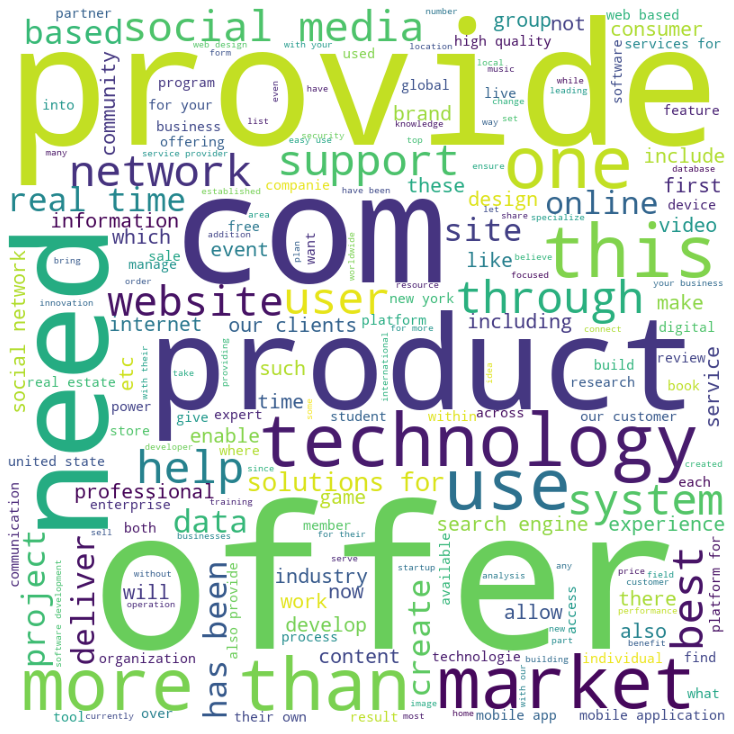

In [77]:
plt.figure(figsize = (10, 10), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()